## Importing Libraries

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## Reading Dataset

In [47]:
df = pd.read_csv('magic04.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


- Create two DataFrames, 'g_rows' and 'h_rows', by filtering rows where the last column of the DataFrame ('iloc[:, -1]') is equal to 'g' or 'h'.
- Calculate the number of rows in each DataFrame using the shape attribute.

In [48]:
g_rows = df[df.iloc[:, -1] == 'g']
h_rows = df[df.iloc[:, -1] == 'h']

In [49]:
g_row_count = g_rows.shape[0] 
h_row_count = h_rows.shape[0]

- Use Matplotlib to create a bar chart that displays the counts of 'g_rows' and 'h_rows' before data balancing.

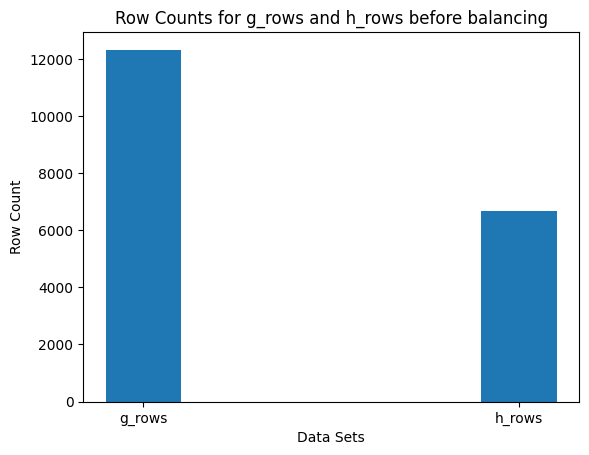

In [50]:
plt.bar(['g_rows', 'h_rows'], [g_row_count, h_row_count], width=0.2)

plt.xlabel('Data Sets')
plt.ylabel('Row Count')
plt.title('Row Counts for g_rows and h_rows before balancing')

plt.show()

## Dataset Balancing using pandas

- Balance the dataset by randomly selecting 'h_row_count' number of rows from 'g_rows' using sample() 
- Using 'random_state' parameter allows you to set a fixed seed value for the random number generator, which ensures that the random processes produce the same results every time you run your code.

In [51]:
new_g_rows = g_rows.sample(h_row_count ,random_state=42) 
new_g_rows_count = new_g_rows.shape[0]

new_g_rows.head()

,0,1,2,3,4,5,6,7,8,9,10
8917,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
772,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
12252,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
7793,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
6601,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g


- Chart to show the counts of 'new_g_rows' and 'h_rows' after balancing.

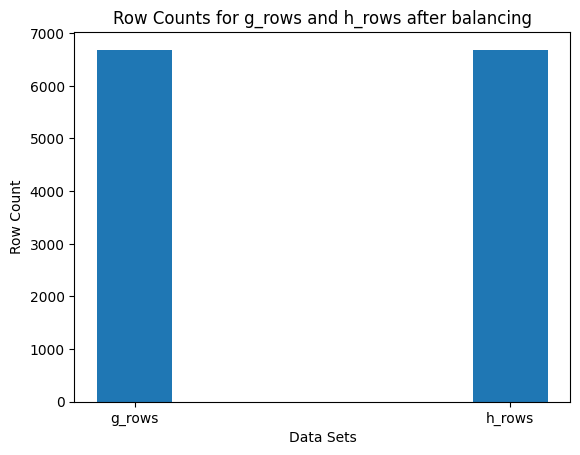

In [52]:
plt.bar(['g_rows', 'h_rows'], [new_g_rows_count, h_row_count], width=0.2)

plt.xlabel('Data Sets')
plt.ylabel('Row Count')
plt.title('Row Counts for g_rows and h_rows after balancing')

plt.show()

-  Concatenate 'new_g_rows' and 'h_rows' to create a new balanced DataFrame 'new_df'.

In [53]:
new_df = pd.concat([new_g_rows,h_rows ],axis=0)

In [54]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10
8917,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
772,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
12252,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
7793,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
6601,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g


## Data Split

- Split the data into features (X) and labels (y).
- Then split the data into training, validation, and testing sets.
- 'X_train' and 'y_train' will be used for training your machine learning model with size 70% of the data.
- 'X_val' and 'y_val' will be used for validating and fine-tuning your model with size 15% of the data.
- 'X_test' and 'y_test' will be used for evaluating the final model's performance with size 15% of the data.


In [55]:
X = new_df.iloc[: , :-1].values
y = new_df.iloc[: , -1].values

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Feature Scaling
- Different features in your dataset may have different scales and units.Feature scaling is an essential preprocessing step in many machine learning algorithms to ensure that all features (variables) have similar scales. 
- The 'StandardScaler' performs a specific type of feature scaling called standardization or (Z-Normalization). Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1. It's done by subtracting the mean and dividing by the standard deviation for each feature.

In [57]:
from sklearn.discriminant_analysis import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_val = sc.transform(X_val)
X_test = sc.transform(X_test)



In [58]:
len(new_df)

13376

## KNN

- Apply KNN model on your data using 'KNeighborsClassifier' with the specified number of neighbors (k) and use the Euclidean distance metric.
- Return the following performance measures:

    - 1-Accuracy:

        - Measures overall correctness of the model's predictions and indicates how well the model classifies instances correctly.
        - It is the ratio of correct predictions to total predictions.

    
    
    - 2-Precision:

        - Focuses on positive class accuracy as it measures the accuracy of the positive predictions made by the model.
        - It is the ratio of true positives to (true positives + false positives).
        - Important when minimizing false positives (e.g., medical diagnosis).
        

    - 3-Recall:

        - Measures the model's ability to identify all relevant instances in the dataset.
        - It is the ratio of true positives to (true positives + false negatives).
        - Critical when minimizing false negatives (e.g., disease identification).


    - 4-F1 Score:

        - Harmonic mean of precision and recall.
        - It provides a single metric that balances precision and recall.
        - Useful when finding a trade-off between precision and recall is necessary, especially with imbalanced data.


    - 5-Confusion Matrix:

        - A confusion matrix is a table that is often used to describe the performance of the classification model.
        - It provides a detailed breakdown of the model's predictions, including true positives, true negatives, false positives, and false negatives.



In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
    
def KNN(k, train_X,train_y,test_X,test_y):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(train_X,train_y)
    pred = knn.predict(test_X)

    accuracy = accuracy_score(test_y,pred)    
    precision = precision_score(test_y,pred , pos_label='g')
    recall = recall_score(test_y, pred, pos_label='g')
    f1 = f1_score(test_y, pred, pos_label='g')
    conf_matrix = confusion_matrix(test_y,pred)

    result = {'k': k , 'accuracy' : accuracy , 'precision' : precision , 'conf_matrix' : conf_matrix , 
                   'recall' : recall , 'f1_score' : f1 }
    return result

-  Store the results of KNN classification for different values of 'k' in 'k_scores'.

In [60]:
k_scores = []
for i in range(1,115,2):
    k_result = KNN(i,X_train,y_train,X_val,y_val)
    k_scores.append(k_result)


##  Performance measures

- Find the KNN result with the highest accuracy.
- Print the best 'k' value and the corresponding accuracy, precision, recall, and F1 score.
- Plot its confusion matrix.

K : 15
Accuracy : 0.820
Precision : 0.779
Recall : 0.898
f1_score : 0.834
Confusion Matrix : 
[[911 103]
 [259 733]]


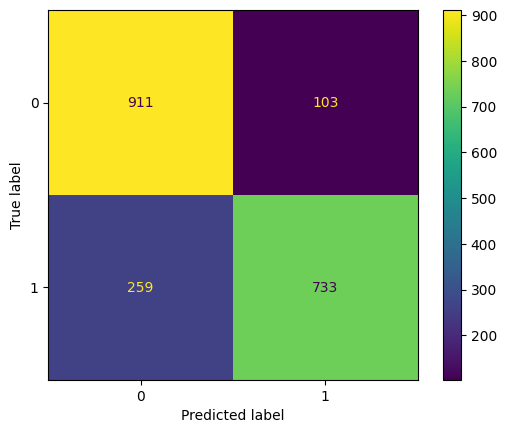

In [61]:
best_k_scores = max(k_scores, key=lambda x: x['accuracy'])
print(f"K : {best_k_scores['k']}")
print(f"Accuracy : {best_k_scores['accuracy']:.3f}")
print(f"Precision : {best_k_scores['precision']:.3f}")
print(f"Recall : {best_k_scores['recall']:.3f}")
print(f"f1_score : {best_k_scores['f1_score']:.3f}")
print("Confusion Matrix : ")
print(best_k_scores['conf_matrix'])
ConfusionMatrixDisplay(best_k_scores['conf_matrix']).plot()
plt.show()

## Comparing performance measures for diffrent k values 
- Create line plots for accuracy, precision, recall, and F1 score as a function of 'k'.

- Display the plot to compare how different 'k' values affect these performance metrics.

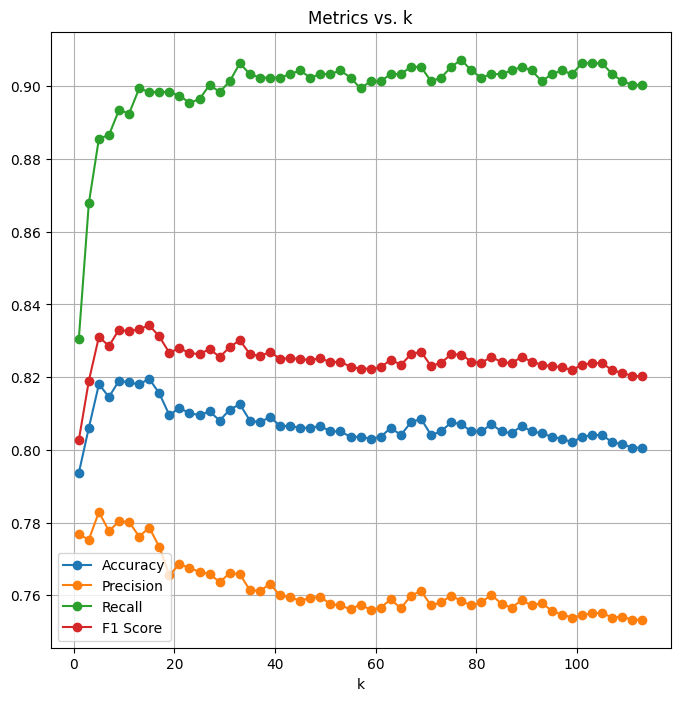

In [62]:
k_values = [item['k'] for item in k_scores]
accuracy_values = [item['accuracy'] for item in k_scores]
precision_values = [item['precision'] for item in k_scores]
recall_values = [item['recall'] for item in k_scores]
f1_score_values = [item['f1_score'] for item in k_scores]

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.plot(k_values, accuracy_values, label='Accuracy', marker='o', linestyle='-')

# Plot precision
plt.plot(k_values, precision_values, label='Precision', marker='o', linestyle='-')

# Plot recall
plt.plot(k_values, recall_values, label='Recall', marker='o', linestyle='-')

# Plot F1-score
plt.plot(k_values, f1_score_values, label='F1 Score', marker='o', linestyle='-')

plt.title('Metrics vs. k')
plt.xlabel('k')
plt.grid(True)

plt.legend()

plt.show()

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=best_k_scores['k'],metric='euclidean')

## Testing
- Using the best 'k' value to perform KNN classification on the test set and print the testing results

In [64]:
testing_result = KNN(best_k_scores['k'], X_train,y_train,X_test,y_test)
print("Testing Result: ", testing_result)

Testing Result:  {'k': 15, 'accuracy': 0.8236173393124065, 'precision': 0.7798634812286689, 'conf_matrix': array([[914,  96],
       [258, 739]], dtype=int64), 'recall': 0.904950495049505, 'f1_score': 0.837763519706691}
